<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/Evaluation_methodologies_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Methodologies 1

## Introduction
The aim of this exercise is to work with the [scikit-learn library](https://scikit-learn.org/stable/getting_started.html) to setup comparative studies of machine learning algorithms. 

In [ ]:
# Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import method related to evaluation
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit, cross_val_score, GridSearchCV

#transformers
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#export the models from the sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


##1. Prepare Dataset: Diabetes Dataset
We will use the Pima Indians diabetes dataset to explore the different evaluation methods provided in sklearn. 
The dataset contains 768 rows and 9 features and is used to build models that can predict the onset of diabetes based on diagnostic measures.


Description of the dataset features are as follows.

0 preg = *Number of times pregnant*

1 plas = *Plasma glucose concentration a 2 hours in an oral glucose tolerance test*

2 pres = *Diastolic blood pressure (mm Hg)*

3 skin = *Triceps skin fold thickness (mm)*

4 test = *2-Hour serum insulin (mu U/ml)*

5 mass = *Body mass index (weight in kg/(height in m)^2)*

6 pedi = *Diabetes pedigree function*

7 age = *Age (years)*

8 class = *Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)*

All of the values in the file are numeric, specifically floating point values. 
We will learn how to load the file first, then use it with sklearn by dividing the data into class labels (Y) and feature sets (X). We don't need to split it into test/train as we are going to use scklearn methods to do that.

In [ ]:
# load dataset
datafile = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
class_index = 8  # this dataset has its class column in location 8

#lets use the convinient pandas library to read and form a data frame of our dataset
df_diabetes_data = pd.read_csv(datafile)

df_diabetes_data.head(5)  # view top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Divide the data into feature sets and label

In [ ]:
array = df_diabetes_data.values
X = array[:,0:class_index] # feature set: select rows and columns up to column index 7 i.e. 0 to 7
y = array[:,class_index] # clas label: select the 8th column index

### Bringing features into the same scale - normalisation
We will use the built in sklearn methods to normalise the columns.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_X_norm = mms.fit_transform(X)

print(train_X_norm)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

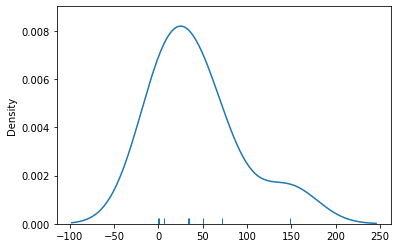

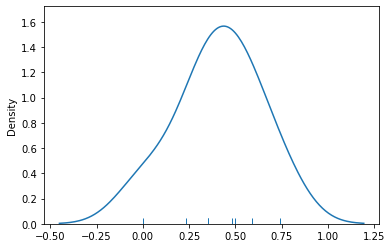

In [ ]:
import seaborn as sns
sns.distplot(X[0], hist=False, rug=True)
plt.show()
sns.distplot(train_X_norm[0], hist=False, rug=True)
plt.show()


## <font color='red'>1.1 Exercise</font> Data Normalisation using the StandardScaler

Normalise the Diabetes dataset feature values using the `StandardScaler` from
[ScikitLearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) .

In [ ]:
# 1.1 Solution
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
train_X_standard = stdsc.fit_transform(X)

print(train_X_standard)

# col_sums = [ sum(x) for x in train_X_standard ]
# rows=len(col_sums)
# means=[ x/rows for x in col_sums ]
# print("\n mean for each column is:", means)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


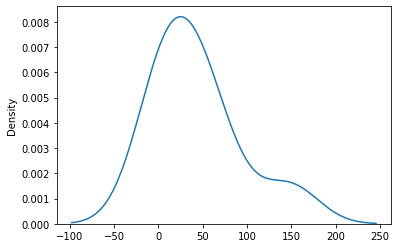

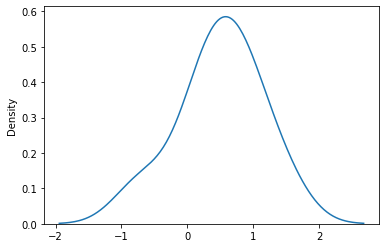

In [ ]:
import seaborn as sns
sns.kdeplot(X[0])
plt.show()
sns.kdeplot(train_X_standard[0])
plt.show()

##2. ML Models: scikit-learn

Scikit-learn machine learning (ML) library for the Python programming language which features various classification, regression and clustering algorithms. We will use the scikitLearn library to access a bunch of ML models already available and run each of them on the Diabetes classification dataset.

For instance with a statement such as: `models.append(('ANN', MLPClassifier()))`, we are using scikit-learn's neural net classifier which is a Multi-layer Perceptron classifier.

### Prepare models

We will be using the default settings for each of the classifiers.

We encourage you to look up the scikit-learn documentation on classifiers to understand the different hyper-parameter settings and how you might change them (http://scikit-learn.org/stable/)


By evaluating our classifier performance on data that has been seen during training, we could get false confidence in the predictive power of our model. In the worst case, it may simply memorise the training samples but completely fail when classifying new, similar samples. We really don't want to put such a system into production!
Instead of using the same dataset for training and testing (this is called "resubstitution evaluation"), it is much much better to use a train/test split in order to estimate how well your trained model is doing on new data.

###  k-Fold Cross-validation
 
Often (labeled) data is precious, but with the previous hold-out (test_train_split) approach we can use only 
~ 3/4 of our data for training. On the other hand, we will only ever try to apply our model 1/4 of our data for testing. A common way to use more of the data to build a model, but also get a more robust estimate of the generalization performance, is to use cross-validation. 

Cross validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split. In cross-validation, the data is split repeatedly into training and non-overlapping test-sets, with a separate model built for every pair. Each split of the data is called a **fold**.

Essentially the algorithm is trained on `k - 1` folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.
The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data. This way, each data point will be in the test-set exactly once, and we can use all but a `k`th of the data for training.

After running cross validation you end up with k different performance scores that you can summarise using a mean and a standard deviation. The result is a more reliable estimate of the performance of the algorithm on new data given your test data. It is more accurate because the algorithm is trained and evaluated multiple times on different data.

#### Choosing number of folds (k)

The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common.

For more details you can also read up on the function at http://scikit-learn.org/stable/modules/cross_validation.html

#### K-Fold Cross-validation on the Diabetes Dataset

Let us apply the k-fold cross-validation technique to evaluate the KNeighborsClassifier algorithm on the Diabetes dataset using 10-folds.

The model_selection.KFold forms the kfold and model_selection.cross_val_score aggregates the scores (specified here as scoring = 'accuracy') providing mean and standard deviation over the specified number of runs (specified here as `n_splits=k` with `k=10`).

LR: 0.853333 (0.135974)
LDA: 0.966667 (0.061464)
KNN: 0.953333 (0.060000)
CART: 0.940000 (0.086667)
NB: 0.946667 (0.058119)
SVM: 0.933333 (0.084327)
ANN: 0.946667 (0.083267)


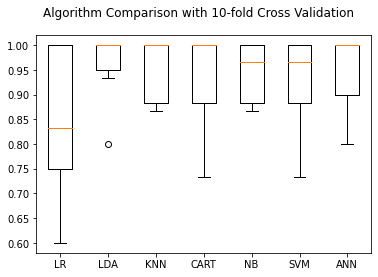

In [ ]:
# evaluate each model in turn
k = 10  # 10-folds
results = []
names = []
scoring = 'accuracy'

##iterate through each model
for name, model in models:
    kfold = KFold(n_splits=k)
    cv_results = model_selection.cross_val_score(model, train_X_norm, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
title = "Algorithm Comparison with " + str(k) + "-fold Cross Validation"
fig.suptitle(title)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Stratification - when do we need it?
By default, cross_val_score will use StratifiedKFold for classification, which ensures that the class proportions in the dataset are reflected in each fold. If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0. If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0. It is generally a good idea to use StratifiedKFold whenever you do classification.

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=1.0)))
models.append(('ANN', MLPClassifier( max_iter=2048)))


seed = 100 #useful for random generators

Fold:  0
Class counts:
np.asarray((unique_elements, counts_elements))
 [[  0.   1.]
 [100.  54.]]


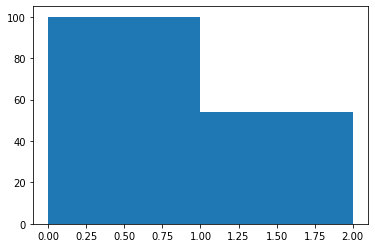

Fold:  1
Class counts:
np.asarray((unique_elements, counts_elements))
 [[  0.   1.]
 [100.  54.]]


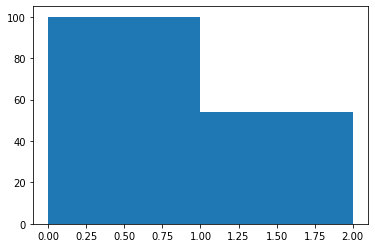

Fold:  2
Class counts:
np.asarray((unique_elements, counts_elements))
 [[  0.   1.]
 [100.  54.]]


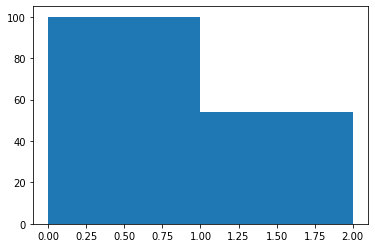

Fold:  3
Class counts:
np.asarray((unique_elements, counts_elements))
 [[  0.   1.]
 [100.  53.]]


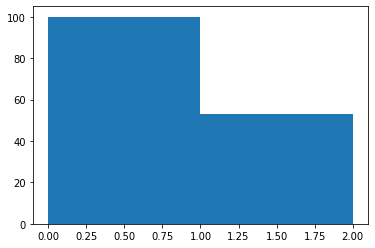

Fold:  4
Class counts:
np.asarray((unique_elements, counts_elements))
 [[  0.   1.]
 [100.  53.]]


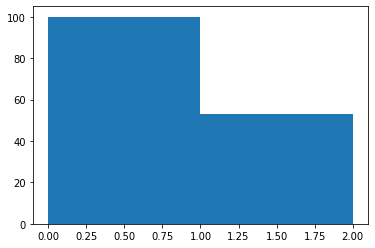

In [ ]:
# in this example we can see how each fold
# will maintain the same class distribution 
# in the test split
kfold = StratifiedKFold(n_splits=5)
idx = 0
for train, test in kfold.split(train_X_norm, y):
    print("Fold: ", idx)
    test_labels = np.asfarray([y[i] for i in test])  
    print("Class counts:")
    #print(test)
    unique_elements, counts_elements = np.unique(test_labels, return_counts=True)
    print("np.asarray((unique_elements, counts_elements))\n", np.asarray((unique_elements, counts_elements)))

    plt.hist(test_labels, bins=[0,1,2]) 
    plt.show()
    idx += 1


By default, cross_val_score will use StratifiedKFold for classification, which ensures that the class proportions in the dataset are reflected in each fold. If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0. If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0. It is generally a good idea to use StratifiedKFold whenever you do classification.

### Iris Dataset - Understanding Stratified Cross-Fold Validation


The labels in iris are sorted, which means that if we split the data without stratification then the first fold will only have the label 0 in it, while the last one will only have the label 2.
To avoid this we want stratification to select instances for folds from different areas of the dataset to ensure a class distribution that is representative of the original dataset. 

Next we will attempt to understand this difference by plotting the locations from where instances are selected for folds over the full dataset.

We will do this by plotting the results for both stratified and non-stratified versions.
We do this by creating a binary vectored mask which marks the location/index of each test instance selected from the dataset.

In [ ]:
#lets load the Iris dataset which is part of the sklearn library
from sklearn.datasets import load_iris
iris = load_iris()  # read dataset
X, y = iris.data, iris.target
class_names = iris.target_names

print("Number of instances: ", len(X))
print("Class counts: ", np.unique(y, return_counts=True))

Number of instances:  150
Class counts:  (array([0, 1, 2]), array([50, 50, 50]))


### Iris Dataset - Visualising Membership of Instances in Folds

In [ ]:
# to help with visualisation
# lets define a generic plot method
# which takes cross-validation folds together with the dataset (X) and class labels (y)
def plot_cv(cv, X,y):
    masks = []
    for train, test in cv.split(X,y):
        mask = np.zeros(len(y), dtype=bool) # initialise a mask of length y to false /zero
       
        mask[test] = 1 # set the mask location True if the corresponding instance was selected as a test instance
        #print(test)
        #print(mask)
        masks.append(mask) # append the mask from this fold
    
    #matshow displays an array as an image
    # cmap is a colour map that uses the mask to show area where test instance indexes were extracted
    # each mask corresponding to a fold is displayed in a row
    plt.matshow(masks, cmap='gray_r', aspect='auto')

Stratified


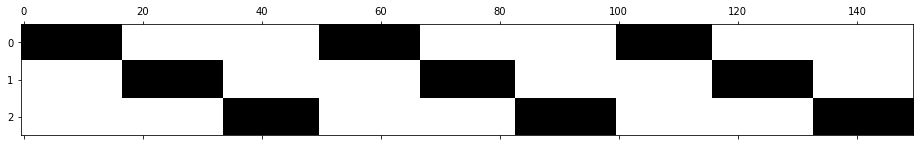

In [ ]:
print("Stratified")
plot_cv(StratifiedKFold(n_splits=3), X, y)

The plot above shows the number of instance ids as columns and the 3 folds are shown as rows. 
WE used 3 here to illustrate how the data organised into 3 classes will be sampled by this stratified k-fold splitter. 

It is worth comparing this to the none stratified splitter KFold.

Not Stratified


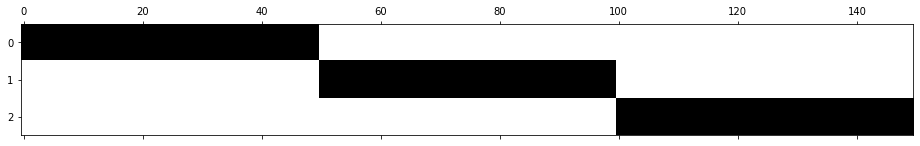

In [ ]:

print("Not Stratified")
plot_cv(KFold(n_splits=3), X, y)

## <font color='red'>2.1 Exercise</font> Role of stratification
- Can you understand the difference due to stratification from the graphic above?
- There is also a version of stratification for the basic train_test_split that we worked with earlier. It is called `StratifiedShuffleSplit`. We return to it in this lab but you can find out more about it here http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

### Iris Dataset - StratifiedShuffleSplit to generate several train-test splits
This generator randomly splits the data into train and test repeatedly. With stratification it ensures that the split maintains class distribution in both train and test. 
This allows the user to specify the number of repetitions and the training/test set size independently.

Note this is very similar to test-train-splits but is stratified by default and by specifying n_splits it repeatedly creates several train-test splits to run models and aggregation an average accuracy over all the train-test splits. 

## <font color='red'>2.2 Exercise</font> Visualise membership of data instances for ShuffleSplit

Visualise the membership of test instances of the Iris dataset for `ShuffleSplit`.

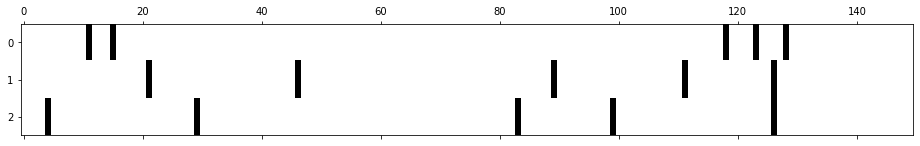

In [ ]:
# SOLUTION 2.2
plot_cv(ShuffleSplit(n_splits=3, test_size=.03, random_state=seed), X, y)

If you look closely you will notice that the first row is not well distributed in terms of where the test instances are being picked. Remember that in the Iris dataset the instances are originally ordered by class.
Ideally what we want to select test instances from across the available classes. 
You can now visualise this using the StratifiedShuffleSplit version.
Note that it is unlikely that you will need to select 0.03 percent only as test set; but we have used this very low value so that you can dive into and understand the plot better. 

## <font color='red'>2.3 Exercise</font> Visualise membership of data instances for StratifiedShuffleSplit

Visualise the membership of test instances of the Iris dataset for `StratifiedShuffleSplit`.

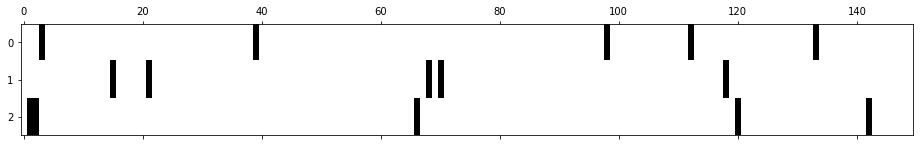

In [ ]:
# SOLUTION 2.3
plot_cv(StratifiedShuffleSplit(n_splits=3, test_size=.03, random_state=seed), X, y)

You can use all of the cross-validation generators as well as the ShuffleSplit generators with the cross_val_score method:

In [ ]:
# evaluate each model in turn
# use 10 iterations of cross validation
sss = StratifiedShuffleSplit(n_splits=10, random_state=seed, test_size=.3)
results = []
names = []
scoring = 'accuracy'

print("Comparative study with stratified test-train splits (or holdout Eval)")
##iterate through each model
for name, model in models:  
    sss_results = model_selection.cross_val_score(model, X, y, cv=sss, scoring=scoring)
    results.append(sss_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, sss_results.mean(), sss_results.std())
    print(msg)
 



Comparative study with stratified test-train splits (or holdout Eval)
LR: 0.964444 (0.024746)
LDA: 0.980000 (0.015556)
KNN: 0.973333 (0.019373)
CART: 0.946667 (0.020367)
NB: 0.951111 (0.029481)
SVM: 0.973333 (0.019373)
ANN: 0.973333 (0.013333)


## Evaluation methodology options
In all our evaluations so far we have been working with accuracy as the main metric of comparison. 

However there are several other scoring metrics (e.g. precision, recall, f1-score, support) other than "accuracy" that can be used to compare results. Modify the code above to explore these metrics. Note that in scikit-learn, default "precision", "recall" and "f1-score" are for binary class only. For multi-class, you will need to use a variant that specifies the averaging method e.g. "precision_micro". Other averaging options are "macro" and "weighted". You can read about the different metrics here: http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

LeaveOneOut (or LOO) is a simple cross-validation approach. 
You can import as `from sklearn.model_selection import LeaveOneOut`. Modify the code above to explore LeaveOneOut. 

Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different test sets. This cross-validation procedure does not waste much data as only one sample is removed from the training set. However it is time consuming ans so mainly used with small datasets. 
You can read more about it here http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut

## <font color='red'>2.4 Exercise</font> Evaluation with LeaveOneOut cross-validation

In [ ]:
# SOLUTION 2.4
from sklearn.model_selection import LeaveOneOut

scoring = 'precision_macro' # 'accuracy' is another option and there are many others
##iterate through each model
for name, model in models:
    leaveoneout = LeaveOneOut()  # initialise the splitter
    cv_results = model_selection.cross_val_score(model, X, y, cv=leaveoneout, scoring=scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.179505)
LDA: 0.980000 (0.140000)
KNN: 0.966667 (0.179505)
CART: 0.946667 (0.224697)
NB: 0.953333 (0.210924)
SVM: 0.966667 (0.179505)
ANN: 0.973333 (0.161107)


##3. Advanced Evaluation Setup  

### How to use Grid Search CV with MNIST?
GridSearchCV carries out an exhaustive search over specified parameter values for a classifier.

Like other cross validation methods, Gridsearch splits up your test set into eqally sized folds, 
uses one fold as test and the rest for training. 

In this way it optimises as many classifiers using the splits from cross validation.

You need to specify the number of folds, a classifier (such as MLP), and a Grid of parameters you may want to optimise as follows:

shape of data sampled: (2000, 785)
shape of X: (2000, 784)
shape of y: (2000,)


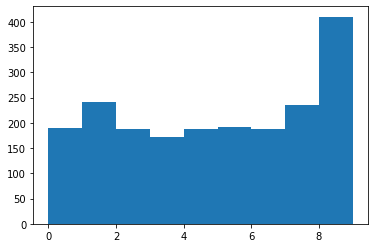

In [ ]:
# load dataset
# datasets to read
# you can change these when trying out other datasets
filename = "sample_data/mnist_train_small.csv"  # 20k dataset

#print('sampling with replacement ... this will take a moment ...')

#let's use the convenient pandas library to read and form a data frame of our dataset
mnist = pd.read_csv(filename, header=None)
#df.head()

#use a very small fraction of the 20K dataset
#sample with replacement
data_array = mnist.sample(frac=0.1, replace=True).values
print('shape of data sampled:', array.shape)


X = data_array[:,1:] # get the features part
y = data_array[:,0] # get the class column - mnist has its class column in first position
print('shape of X:', X.shape)
print('shape of y:', y.shape)
labels = np.asfarray(y) #array of just the class column

#basic plot to visualise the histogram of the class values
plt.hist(labels, bins=[0,1,2,3,4,5,6,7,8,9]) # use bins here to control the order in which classes are plotted on x-axis
plt.show()

### MNIST - Setup a grid search to explore a variety of parameters relevant to a classifier
In this example we will setup grid search for a MLPClassifier model (i.e. a neural network) from the scikit-learn library. 
Therefore the grid search will explore a variety of parameters that are relevant to this specific classifier. 

Obviously if you are working with a different classifier then you must use and explore parameters relevant to that specific classifier. 

For the MLPClassifier we explore different parameter settings for activation functions, weight update methods and hidden layer sizes.
Details on parameters appear http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

For activation we will use identity (no activation), sigmoid and relu. As optimisers we can explore sgd (stochastic gradient descend) and adam. 


In [ ]:
param_grid = [
        {
            'activation' : ['identity', 'sigmoid', 'relu'], 
            'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes': [(10,),(30,)]  # (10,) is a single hidden layer with 10 neurons
        }
       ]

In [ ]:
# generate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print("Searching for best parameters - this will take a moment ...")
clf = GridSearchCV(MLPClassifier(max_iter=2048), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train,y_train)
print("Best parameters set found on validation:")
print(clf.best_params_)
print("Accuracy", clf.best_score_)

Searching for best parameters - this will take a moment ...
Best parameters set found on validation:
{'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'adam'}
Accuracy 0.8007142857142858


### MNIST - Use the best found parameter combination to create and test a model

We can use the parameters that were returned by `GridSearchCV`; (in our example this will be `clf.best_params_`) to create a new model.
We also use two new method to provide some useful statistics about the model performance: `classification_report` and `confusion_matrix`.

In [ ]:
print("Best estimator found by grid search:")
print(clf.best_params_)

print("Predicting on the test set")
y_pred = clf.predict(X_test)  # 'predict' uses the best found parameters
print("Target labels: ", y_test)
print("Predicted labels: ", y_pred)

incorrect_idx = np.where(y_pred != y_test)[0]
print("Incorrectly classified: ", incorrect_idx)


Best estimator found by grid search:
{'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'adam'}
Predicting on the test set
Target labels:  [9 1 0 4 9 0 8 4 2 3 3 0 7 8 2 8 2 7 2 5 0 4 9 8 4 2 0 0 6 3 1 9 1 2 7 9 6
 4 4 8 0 2 2 0 4 7 5 2 2 9 3 2 5 1 5 0 1 5 8 6 4 3 2 1 1 8 9 7 5 9 0 1 1 9
 1 5 0 9 9 2 5 8 0 8 1 1 5 9 1 0 5 6 7 8 1 4 1 3 9 2 9 2 4 1 9 3 0 4 8 9 1
 4 0 5 4 9 7 7 7 3 1 1 7 5 1 0 2 3 6 0 4 9 0 3 1 1 7 8 8 3 0 3 1 0 2 5 3 1
 7 8 1 9 5 3 8 6 0 2 4 1 2 6 4 9 3 7 2 5 9 1 7 5 0 5 0 0 3 9 4 7 7 4 8 3 9
 9 9 2 7 2 5 1 8 2 5 7 9 7 2 0 5 6 9 0 2 2 3 0 2 4 1 4 8 5 1 8 8 5 0 0 0 9
 3 5 1 5 8 0 6 6 2 2 9 8 2 6 0 9 8 2 6 5 7 4 5 8 4 8 5 2 3 4 4 4 1 5 2 1 4
 3 1 8 8 1 8 5 7 5 0 9 6 9 1 9 1 3 9 3 8 5 6 3 8 5 9 5 2 7 3 7 4 1 6 9 6 7
 6 5 1 3 8 1 8 5 6 8 6 4 8 1 0 4 9 0 7 8 8 8 7 1 8 9 3 9 2 9 2 5 6 4 1 6 0
 2 6 6 4 9 1 6 6 0 3 1 8 0 3 6 4 1 1 3 5 4 5 0 4 7 8 7 8 8 6 0 4 1 9 3 6 6
 9 8 1 4 1 7 2 2 8 6 1 7 7 1 0 5 5 6 6 1 1 6 3 9 1 0 9 1 8 2 2 5 6 0 8 3 5
 0 4 6 6 6 1 0 2 3 4 

In [ ]:
#store the class names for plotting later on
class_names = []
for i in range(0,10):  # 0 to 9 for class names
    class_names.append(str(i))

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.87      0.97      0.92        75
           2       0.81      0.81      0.81        64
           3       0.90      0.81      0.85        53
           4       0.79      0.83      0.81        53
           5       0.83      0.79      0.81        57
           6       0.83      0.92      0.88        53
           7       0.83      0.80      0.81        54
           8       0.79      0.70      0.74        64
           9       0.78      0.76      0.77        59

    accuracy                           0.84       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.84      0.84       600



In [ ]:
y_test2 = pd.Series(y_test)
y_pred2 = pd.Series(y_pred)

#create a confusion matrix
pd.crosstab(y_test2, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)  # cross tabulation of predicted and true digits

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,64,0,1,0,0,1,1,1,0,0,68
1,0,73,1,0,0,1,0,0,0,0,75
2,0,2,52,3,2,0,2,2,1,0,64
3,0,0,3,43,0,2,1,0,3,1,53
4,0,0,1,0,44,0,1,0,3,4,53
5,2,2,1,0,0,45,4,2,1,0,57
6,1,1,1,0,0,0,49,0,1,0,53
7,0,0,1,0,1,0,1,43,2,6,54
8,0,6,3,2,1,5,0,0,45,2,64


#### Plot and visualise a confusion matrix
For this we will use the heatmap function from the seaborn library. You can compare the quality of the graph provided with and without seaborn.

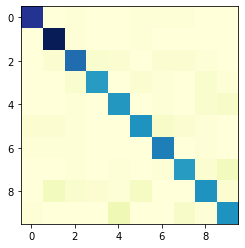

In [ ]:
# there is an inbuilt confusion matrix method we can use
conf=confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap="YlGnBu", interpolation='None')  # see more on colour maps - https://www.kite.com/python/docs/matplotlib.pyplot.colormaps
plt.show()


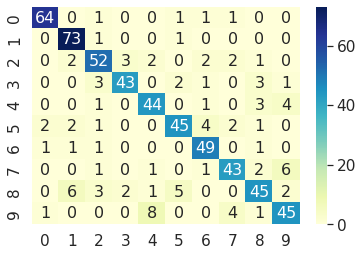

In [ ]:
# or we can use a heatmap from the seaborn library
import seaborn as sn
df_cm = pd.DataFrame(conf, range(10), range(10))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16})  # font size

### Working with other classifiers
You can conduct a grid search with different classifiers from scikit-learn such as the SVM (support vector machine). 

SVM maps training data to points in space so as to maximise the gap between the different classes by finding an optimal boundary/hyperplane. New examples are then mapped into that same space and predicted to belong to a class based on which side of the boundary they fall.

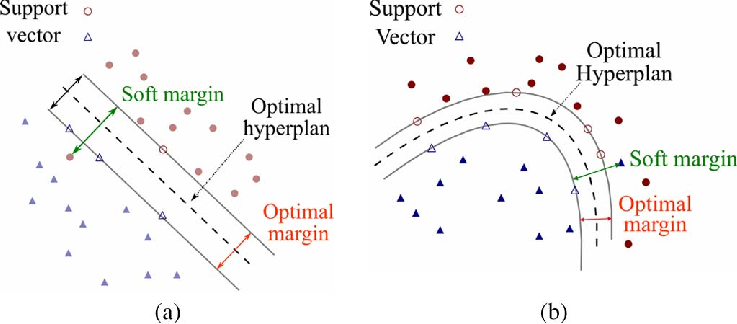

Useful links to learn more about SVM:
- [Support Vector Machines - scikit learn](http://scikit-learn.org/stable/modules/svm.html)
- [Support Vector Machines Explained - Medium](https://medium.com/@zachary.bedell/support-vector-machines-explained-73f4ec363f13)
- [Support-vector machine - Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)

In [ ]:
# Visualisation on classifying data points that are not linearly separable using SVM.

from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/OdlNM96sHio?start=3&end=45" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## <font color='red'>3.1 Exercise</font>: Parameter grid for SVM classifier

Create a parameters' grid to apply `GridSearchCV` to the SVM classifier, SVC (Support Vector Classification) that we used earlier. Specify at least 2 options for each chosen parameter.

You can read about this classifier and its parameters that you could apply grid search to here https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
# SOLUTION 3.1
svm_parameters = [
    {
        'kernel': ['rbf', 'linear'], 
        'gamma': [0.1, 0.7, 1e-3],
        'C': [1, 10, 100]
    }
]

## <font color='red'>3.2 Exercise</font>: Find the best parameters for SVM classifier

Conduct a grid search for the SVM classifier to determine the best parameter values using the MNIST sample dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)  # generate train and test data

# SOLUTION 3.2

print("Searching for best parameters - this will take a moment ...")
clf = GridSearchCV(SVC(), svm_parameters, cv=5, scoring='accuracy')
clf.fit(X_train,y_train)
print("Best parameters set found on validation:")
print(clf.best_params_)
print(clf.best_score_)

Searching for best parameters - this will take a moment ...
Best parameters set found on validation:
{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.8685714285714287


## <font color='red'>3.3 Exercise</font>: Classification report for the SVM classifier using the best parameters

Generate a classification report of the SVM classifier's performance on the MNIST test dataset. Can you identify the digits that were most difficult for the classifier based on classification precision?

In [ ]:
# SOLUTION 3.3
print("Predicting on the test set")
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

Predicting on the test set
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.91      1.00      0.95        70
           2       0.90      0.80      0.85        59
           3       0.87      0.86      0.87        64
           4       0.88      0.86      0.87        49
           5       0.78      0.93      0.85        46
           6       0.97      0.92      0.95        66
           7       0.89      0.95      0.92        62
           8       0.96      0.82      0.89        66
           9       0.84      0.86      0.85        69

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

